<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/MCSO/notebooks/15_BolsaLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For reading stock data from yahoo
import pandas_datareader.data as dt

In [ ]:
# For time stamps
from datetime import datetime



datetime.datetime(2020, 5, 16, 0, 0)

In [ ]:
df = dt.DataReader("AAPL", 
                       start='2021-1-1', 
                       end='2021-05-13', 
                       data_source='yahoo')

#data.plot(title='AAPL Adj. Closing Price')


In [ ]:
# o lo podemos poner en modo más genérico

End = datetime.now()
Start = datetime(end.year - 10, end.month, end.day)
#start='2012-01-01
df = dt.DataReader('AMZN', data_source='yahoo', start=Start, end=End)
#data.plot(title='amazon Closing Price')



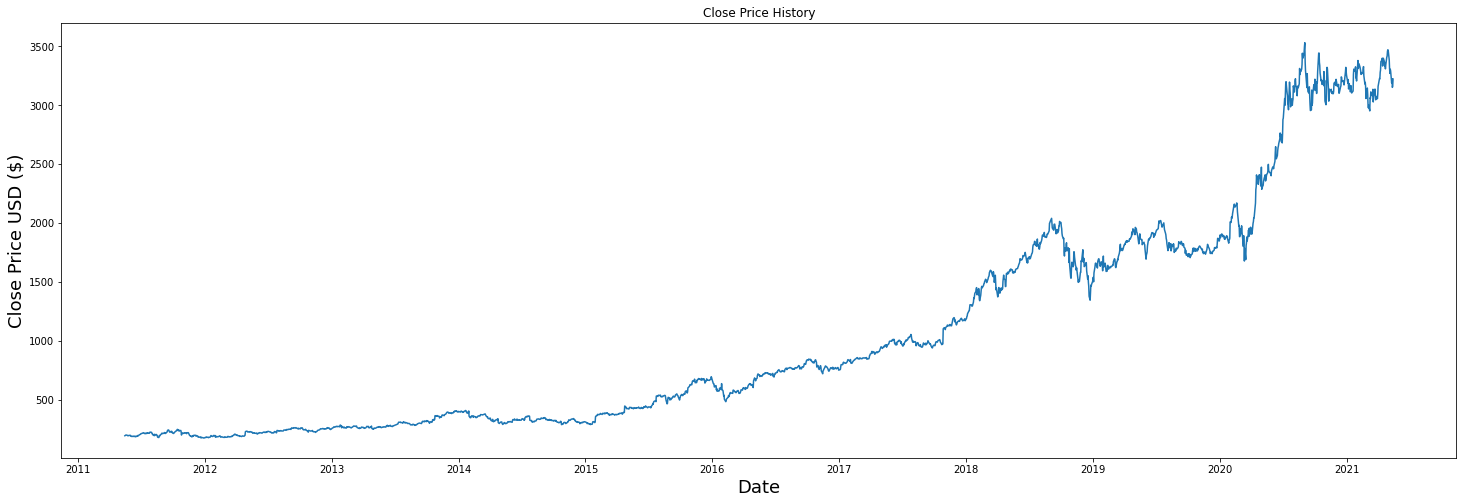

In [ ]:
# mostramos gráfica

plt.figure(figsize=(25,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
Start

datetime.datetime(2011, 5, 16, 0, 0)

In [ ]:
data.head()

,Close
Date,
2021-01-04,129.410004
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
2021-01-08,132.050003


In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

In [ ]:
                 
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2392

In [ ]:
data.shape

(2517, 1)

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00577962],
       [0.00646448],
       [0.00714339],
       ...,
       [0.8869951 ],
       [0.88983281],
       [0.90812451]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
# revisemos las dimensiones de los conjuntos de datos
print(data.shape)
print(train_data.shape)
print('el restante para el conjunto de test: %i' % (len(data)-len(train_data)))

(2517, 1)
(2392, 1)
el restante para el conjunto de test: 125


Podemos ver que es muy interesante porque entrena muy rápido con LSTM

Para resumir podemos decir que es una versión mejora de las RNN con memoria a largo plazo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 64s 26ms/step - loss: 0.0024


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

86.38321871868462

In [ ]:
# vemos y comprobamos el tamaño dejado para el conjunto de datos test
test_data.shape

(185, 1)

In [ ]:
predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


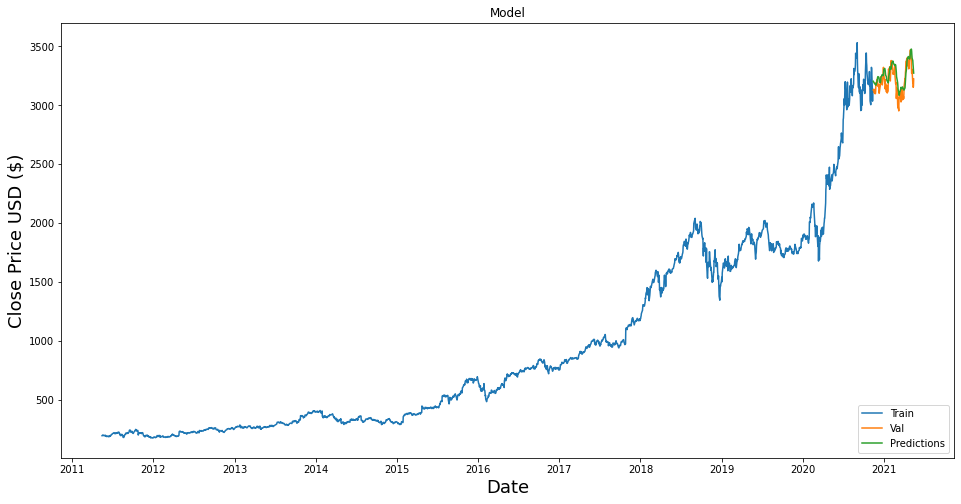

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions  # añadimos una columna al dataset test con las predicciones y así lo podemos comparar como vemos en la tabla de abajo
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Es interesante ver como el modelo acierto mucho más cuanto mejor se le entrena. Vemos un ejemplo.

Aquí hemos cogido las acciones de Apple pero sólo desde enero de este año.
La predicción no es muy buena

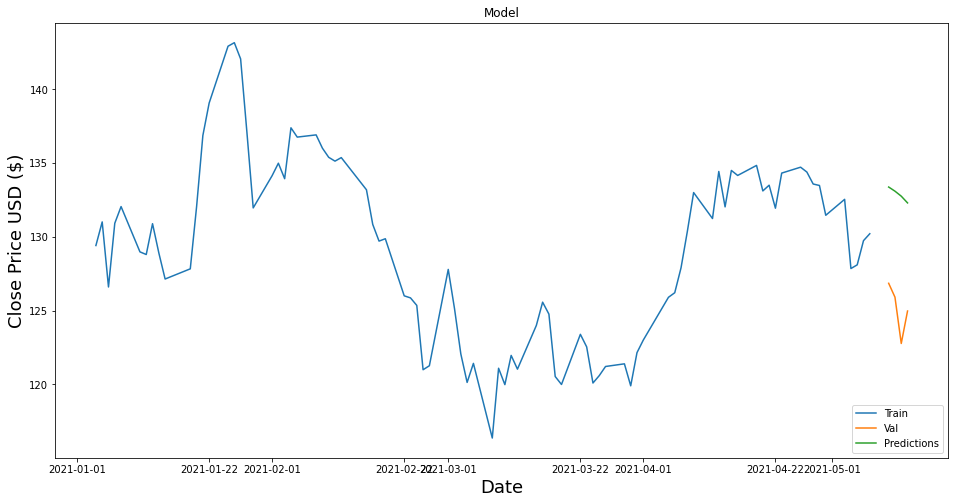

Sin embargo en la siguiente gráfica se ha seleccionado otro valor bursatil, por ejemplo amazon en este caso desde 2011. Podemos ver un resultado mucho más preciso

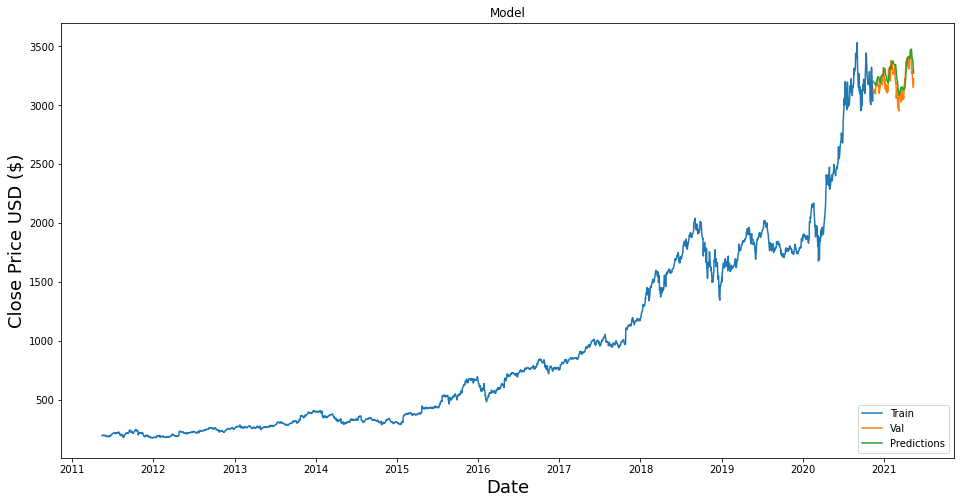

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-05-10,126.849998,133.375488
2021-05-11,125.910004,133.094620
2021-05-12,122.769997,132.755325
2021-05-13,124.970001,132.298462
